In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [3]:
ESR=pd.read_csv('Epileptic Seizure Recognition.csv')
print(ESR.head())
cols=ESR.columns
target=ESR.y[:]
target[target>1]=0
non_seizure,seizure=target.value_counts()
print(f'\nThe number of trials for the non-seizure class is {non_seizure}')
print(f'The number of trials for the seizure class is {seizure}')

      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

The number of trials for the non-seizure class is 9200
The number of trials for the seizure class is 2300


In [4]:
print(ESR.isnull().sum())
print(ESR.info())
X=ESR.iloc[:,1:179].values
print(X.shape)

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
None
(11500, 178)


1 1 0 0 0


Text(0.5, 0, 'samples')

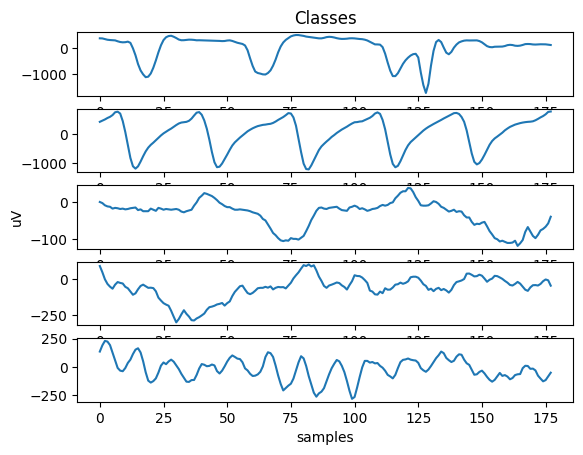

In [5]:
Y=ESR.iloc[:,179].values
print(Y[1],Y[20],Y[7],Y[12],Y[0])
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.subplot(512)
plt.plot(X[20,:])
plt.subplot(513)
plt.plot(X[7,:])
plt.ylabel('uV')
plt.subplot(514)
plt.plot(X[12,:])
plt.subplot(515)
plt.plot(X[0,:])
plt.xlabel('samples')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)
clf.fit(X_train,Y_train)
acc_log_reg=round(clf.score(X_test,Y_test)*100,2)
print(f'Logistic Regression accuracy : {acc_log_reg}%')

Logistic Regression accuracy : 82.83%


In [10]:
from sklearn.svm import SVC
clf=SVC(max_iter=10000)
clf.fit(X_train,Y_train)
acc_svc=round(clf.score(X_test,Y_test)*100,2)
print(f'SVC accuracy : {acc_svc}%')


SVC accuracy : 96.78%


In [11]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(X_train,Y_train)
acc_svc=round(clf.score(X_test,Y_test)*100,2)
print(f'Linear SVC accuracy : {acc_svc}%')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC accuracy : 85.0%


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,Y_train)
acc_KNeighborsClassifier=round(clf.score(X_test,Y_test)*100,2)
print(f'K Neighbors Classifier accuracy : {acc_KNeighborsClassifier}%')


K Neighbors Classifier accuracy : 92.83%


In [13]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,Y_train)
acc_GaussianNB=round(clf.score(X_test,Y_test)*100,2)
print(f'GaussianNB accuracy : {acc_GaussianNB}%')

GaussianNB accuracy : 95.61%
